homework 4
---
# Part 1: simulating t-test for combinations of group size and standard deviation  

In [341]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

sd_space = np.linspace(20,210,20, dtype=int) # will be varied
size_space = np.linspace(20,210,20, dtype=int) # will be varied
mean_1 = 500 # fixed
mean_2 = 520 # fixed
alpha = 0.05
n_simulations = 1000

def simulate_t(mean_1, mean_2, sd, size, n_iter=1000, alpha=0.05):
    p_values = np.array([stats.ttest_ind(np.random.normal(mean_1,sd,size),np.random.normal(mean_2,sd,size))[1] for i in range(n_iter)])
    return np.sum(p_values<alpha) / n_iter

### Single scenario simulation

In [419]:
import ipywidgets as widgets

sd_slider = widgets.SelectionSlider(options=sd_space, description='SD')
size_slider = widgets.SelectionSlider(options=size_space, description='sample size')

def f(sd_slider, size_slider):
    prop = simulate_t(mean_1,mean_2,sd_slider,size_slider,n_simulations,alpha)
    print(f"\nproportion of significant cases in {n_simulations} simulations: {prop}")

out = widgets.interactive_output(f, {'sd_slider': sd_slider, 'size_slider': size_slider})

widgets.VBox([widgets.VBox([sd_slider, size_slider]), out])

### Computing the proportions of significant *p*-values for all 400 scenarios

In [414]:
%%time

props = np.ones((len(sd_space),len(size_space)))

for i,sd in enumerate(sd_space):
    for j,size in enumerate(size_space):
        new_prop = simulate_t(mean_1, mean_2, sd,size, n_iter=n_simulations, alpha=alpha)
        props[i,j] = new_prop

CPU times: user 2min 5s, sys: 36 ms, total: 2min 5s
Wall time: 2min 5s


### Observation

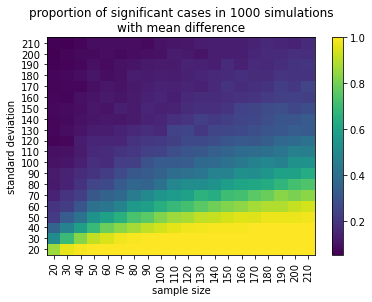

In [426]:
plt.pcolor(props)
plt.ylabel("standard deviation")
plt.yticks(0.5 + np.arange(len(sd_space)),labels=sd_space)
plt.xlabel("sample size")
plt.xticks(0.5 + np.arange(len(size_space)),labels=size_space,rotation=90)
plt.title(f"proportion of significant cases in {n_simulations} simulations\nwith mean difference")
plt.colorbar()
plt.savefig("hw04_01.png",dpi=300, facecolor='white',bbox_inches="tight");

### What do you observe and why? Write a few sentences

...

# Part 2: simulation with no mean difference

### Computing the proportions of significant *p*-values for all 400 scenarios

In [416]:
%%time

mean = 500 # fixed

props_no_diff = np.ones((len(sd_space),len(size_space)))

for i,sd in enumerate(sd_space):
    for j,size in enumerate(size_space):
        new_prop = simulate_t(mean, mean, sd,size, n_iter=n_simulations, alpha=alpha)
        props_no_diff[i,j] = new_prop

CPU times: user 2min 1s, sys: 6.43 ms, total: 2min 1s
Wall time: 2min 1s


### Observation

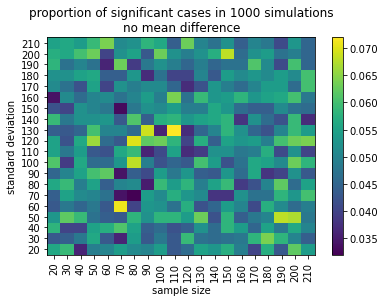

In [428]:
plt.pcolor(props_no_diff)
plt.ylabel("standard deviation")
plt.yticks(0.5 + np.arange(len(sd_space)),labels=sd_space)
plt.xlabel("sample size")
plt.xticks(0.5 + np.arange(len(size_space)),labels=size_space,rotation=90)
plt.title(f"proportion of significant cases in {n_simulations} simulations\nno mean difference")
plt.colorbar()
plt.savefig("hw04_02.png",dpi=300,facecolor='white',bbox_inches="tight");

### What do you observe and why could that be the case?  

...

### Compare it to the previous figure, from the the true difference simulation..

* what do you observe? Why? 
* write a short answer (max 5 sentences), and submit to the "texteingabe" in moodle
* now you do not need to submit the code, only the figure you have created! so save the figure and upload it to the moodle homework submission form 


